# Linear regression with minimal `PyTorch`: cloud of data
## Goal
To fit a cloud of data points
$$\{(x_1, y_1), \dots, (x_N, y_N)\}$$
with a affine (linear) map
$$x\mapsto y=b+mx\,.$$

## Optimization
The approximating affine map is obtained by successive approximations,
$$ y = b^{(n)} + m^{(n)}x\qquad n=1, 2, \dots, N$$
using gradient descent.

## Evaluation
For comparison, we plot the linear regression derived analytically in `Scikit-Learn`.


## Note: minimal `PyTorch`
By minimal `PyTorch`, we mean that we only use its automatic differentiation capabilities as opposed to calculating derivatives manually (where `numpy` would suffice).

Other features that `PyTorch` provides but which are not used here are:   
- update of model parameters via optimizers
- dataloaders
- `torch.nn.Modules`, especially convenient for more complex architecture (not needed for linear regression)

---
tags: pytorch, tutorial, linear regression, minimal

# Imports

In [1]:
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

# Helper functions

In [2]:
def mse(preds, targs):
    return ((preds - targs)**2).sum()

# Data

In [3]:
N = 10
x = (-1 + 2*torch.rand(1, N)).view(-1, 1)
sigma = .5
h = sigma*torch.randn(1, N).view(-1, 1)
targs = .5 + x + h

# Ordinary least squares linear regression
Calculate the linear regressor using closed form using `sklearn`:

In [4]:
linreg = LinearRegression()

linreg.fit(x, targs)

preds_lms = linreg.predict(x)
loss_lms = mse(targs.numpy(), preds_lms)
print(f"{'Slope':<10} m={linreg.coef_[0,0]:.4f}")
print(f"{'Intercept':<10} b={linreg.intercept_[0]:.4f}")
print(f"{'Loss':<10} L={loss_lms:.4f}")

Slope      m=0.8210
Intercept  b=0.6139
Loss       L=2.1070


# Linear model

In [5]:
model = nn.Linear(1, 1)

losses = []
weights = []
biases = []

# Training

In [6]:
lr = .05 # learning rate
n_iters = 10

for _ in range(n_iters):
    preds = model.forward(x)
    loss = mse(preds, targs)
    loss.backward()
    
    for param in model.parameters():
        with torch.no_grad():
            param -= lr*param.grad.item()
        param.grad.zero_() 
    weights.append(model.weight.item())
    biases.append(model.bias.item())
    losses.append(loss.item())

# Visualization

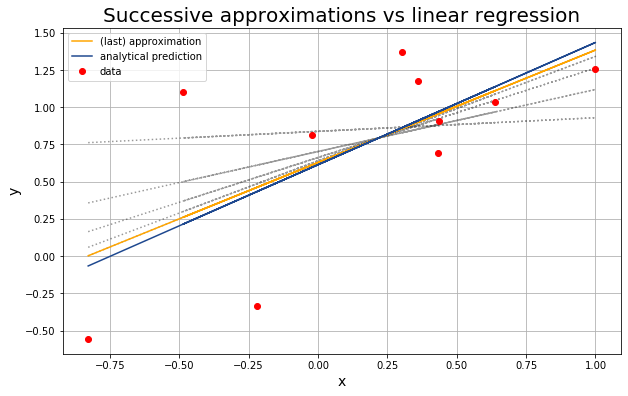

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

for w, b in zip(weights[::2], biases[::2]):
    preds = w*x+b
    
    ax.plot(x, preds.detach().numpy(), 'k:', alpha=.4)
ax.plot(x, preds.detach().numpy(), 'Orange', label='(last) approximation') # last iteration
ax.plot(x, preds_lms, 'xkcd:cobalt', label='analytical prediction')
ax.plot(x, targs, linestyle='', marker='o', color='r', label='data');

ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
ax.set_title("Successive approximations vs linear regression", fontsize=20);
ax.legend();
ax.grid();

# Successive losses

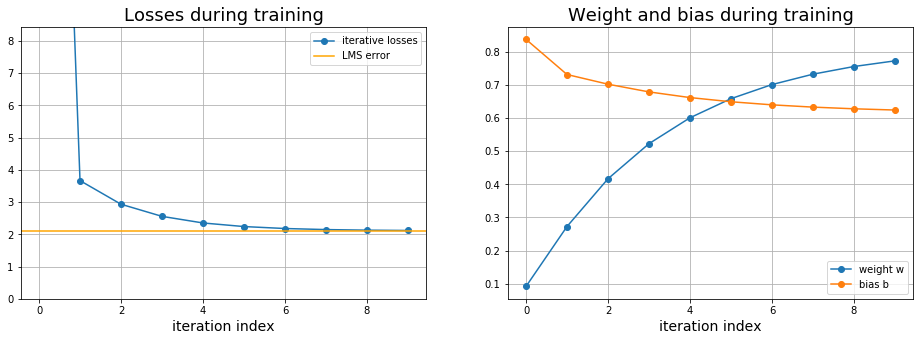

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
ax.plot(losses, 'o-', label='iterative losses')
ax.axhline(loss_lms, color='Orange', label='LMS error')
ax.grid();
ax.legend();
ax.set_xlabel("iteration index", fontsize=14);
ax.set_title("Losses during training", fontsize=18);
# ax.set_ylim([0, max(losses).item() + 1]);
ax.set_ylim(0, min(4*loss_lms, max(losses) + 1))

ax = axs[1]

ax.plot(weights, 'o-', label='weight w')
ax.plot(biases, 'o-', label='bias b')
ax.grid();
ax.legend();
ax.set_xlabel("iteration index", fontsize=14);
ax.set_title("Weight and bias during training", fontsize=18);